# Heart Health Analysis
### By:  Keith D. Smith
### February 5, 2023

# Acquire Data

### Import Libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

## Import Data

In [2]:
df = pd.read_csv('heart_data.csv')

# Prepare Data

In [3]:
df.__dir__()

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [4]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [30]:
df["age"] = df["age"]/365
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [31]:
df.shape

(70000, 14)

In [32]:
df[df.isnull().any(axis=1)]

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [33]:
feature_names = df.columns[2:]

In [34]:
heart_df = pd.DataFrame(df, columns = feature_names)

In [35]:
heart_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [36]:
heart_df.isnull().sum().any()

False

## Exploratory Data Analysis (EDA)

In [37]:
heart_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
heart_df["gender"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [39]:
heart_df["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [40]:
heart_df["gluc"].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [41]:
heart_df["smoke"].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [42]:
heart_df["alco"].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [43]:
heart_df["active"].value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [44]:
heart_df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<AxesSubplot:xlabel='cardio', ylabel='age'>

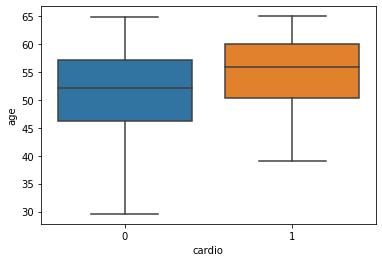

In [45]:
sns.boxplot(data=heart_df, x="cardio", y="age")

<AxesSubplot:xlabel='cardio', ylabel='height'>

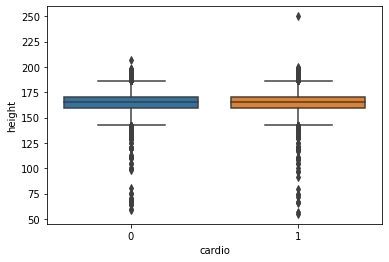

In [46]:
sns.boxplot(data=heart_df, x="cardio", y="height")

<AxesSubplot:xlabel='cardio', ylabel='weight'>

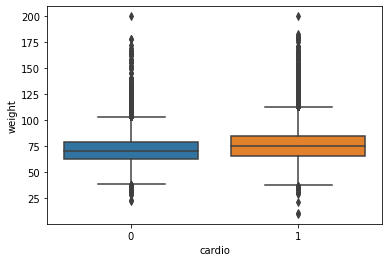

In [47]:
sns.boxplot(data=heart_df, x="cardio", y="weight")

<AxesSubplot:xlabel='cardio', ylabel='ap_hi'>

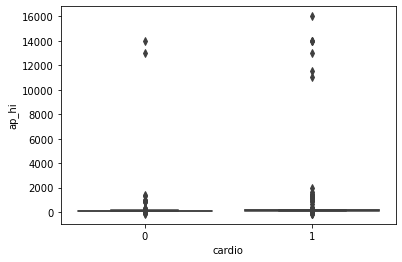

In [48]:
sns.boxplot(data=heart_df, x="cardio", y="ap_hi")

<AxesSubplot:xlabel='cardio', ylabel='ap_lo'>

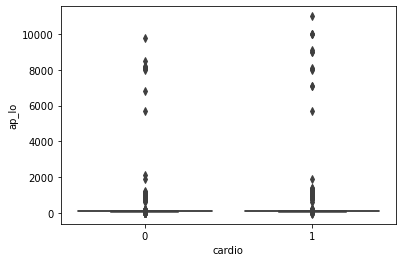

In [49]:
sns.boxplot(data=heart_df, x="cardio", y="ap_lo")

<AxesSubplot:xlabel='gender', ylabel='count'>

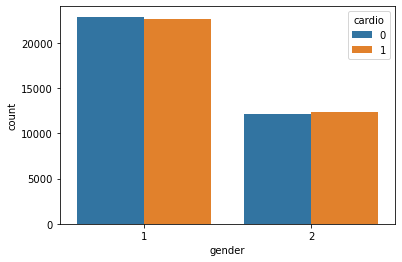

In [55]:
sns.countplot(data=heart_df, x="gender", hue="cardio")

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

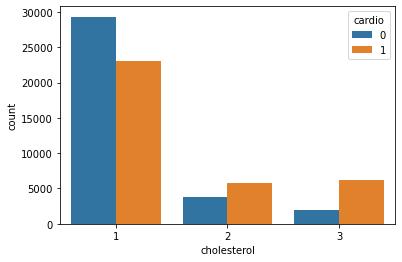

In [56]:
sns.countplot(data=heart_df, x="cholesterol", hue="cardio")

<AxesSubplot:xlabel='gluc', ylabel='count'>

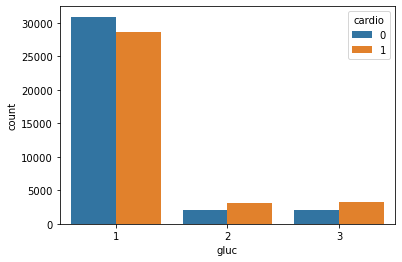

In [57]:
sns.countplot(data=heart_df, x="gluc", hue="cardio")

<AxesSubplot:xlabel='smoke', ylabel='count'>

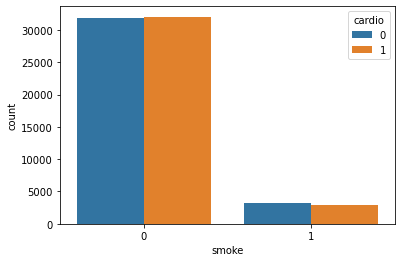

In [58]:
sns.countplot(data=heart_df, x="smoke", hue="cardio")

<AxesSubplot:xlabel='alco', ylabel='count'>

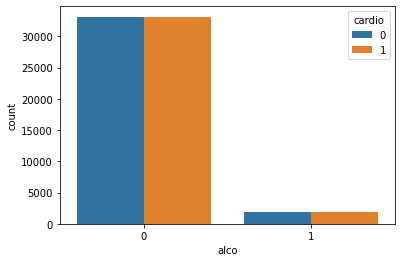

In [59]:
sns.countplot(data=heart_df, x="alco", hue="cardio")

<AxesSubplot:xlabel='active', ylabel='count'>

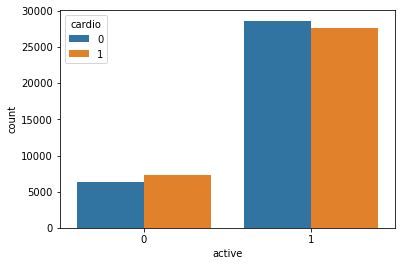

In [60]:
sns.countplot(data=heart_df, x="active", hue="cardio")